## Week3 Exercise

In [ ]:
#Kaggle'a üye olarak titanic veri kümesini indirdim. Burada ilk olarak veri kümesi için kullanacağım kütüphaneleri import ettim. 
#Bu kütüphanede matplotlib ve seaborn kütüphanelerini nümerik ve kategorik değişkenleri görselleştirmek için kullanmaktayız.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

In [3]:
#Bu satırda, pandas kütüphanesi ile veri kümesini okumayı gerçekleştirdik.
titanic_df = pd.read_csv("C:/Users/victus/Documents/data.project/data/titanic.csv")

In [4]:
#Bu satırda, titanic_df adlı pandas DataFrame üzerinde describe() ve ardından T (transpose) fonksiyonlarını kullanarak temel istatistiksel bilgileri almak ve bu bilgileri transpoze etmek için yaptığımız bir işlemdir.
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
# Eksik değerleri kontrol etme
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Eksik değerleri çıkarma veya doldurma
a = titanic_df.dropna(inplace=True) 

In [16]:
print(a)

63


In [7]:
# Cinsiyet (Sex) sütunundaki frekansları gösterme
sex_counts = titanic_df['Sex'].value_counts()

In [8]:
print(sex_counts)

Sex
male      95
female    88
Name: count, dtype: int64


In [9]:
# Yaş (Age) sütunundaki ortalama ve medyanı gösterme
age_mean = titanic_df['Age'].mean()
age_median = titanic_df['Age'].median()

In [10]:
print(age_mean, age_median)

35.6744262295082 36.0


In [11]:
print(titanic_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
cat_cols=[
    'Survived',
    'Pclass',
    'Name',
    'Sex',
    'Age'
]

In [13]:

#Bu kod, bir döngü kullanarak cat_cols adlı bir değişken içindeki kategorik sütunlardan birini seçer (i ile temsil edilir) ve ardından bu sütundaki benzersiz değerlerin sayısını (nunique()) hesaplar

for i in cat_cols:
    a= titanic_df[i].nunique()
    print(f"{i}: {a}")

Survived: 2
Pclass: 3
Name: 183
Sex: 2
Age: 63


C:\Users\victus\AppData\Local\Temp\ipykernel_13320\1078251008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grouped_counts.values, y = grouped_counts.index, palette = 'husl');


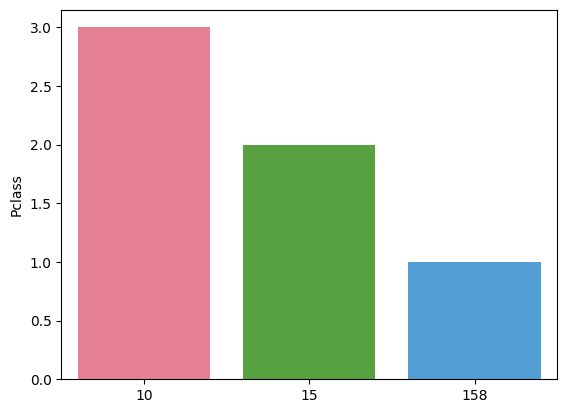

In [18]:
#Bu kod, Titanic veri setindeki "Pclass" (Yolcu Sınıfı) sütununa göre gruplama yapar ve her sınıftaki yaş (Age) değerlerinin sayısını hesaplar. Ardından, bu sayıları büyükten küçüğe sıralar ve bu sıralı değerleri bir çubuk grafik (bar plot) ile görselleştirir.

grouped_counts = titanic_df.groupby("Pclass")["Age"].count().sort_values(ascending=False)
#sorted_counts = grouped_counts.sort_values(ascending=False)
#print(sorted_counts)
sns.barplot(x = grouped_counts.values, y = grouped_counts.index, palette = 'husl');

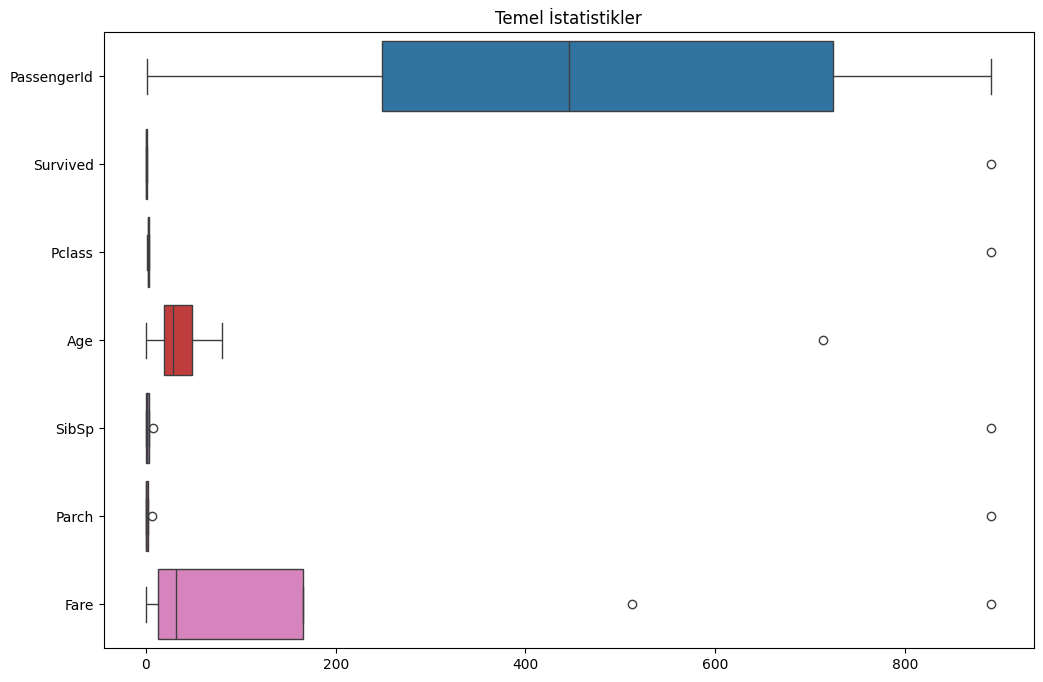

In [21]:
# Veri setinden temel istatistikleri içeren bir DataFrame oluşturma
stats_df = pd.DataFrame({
    'count': [891.0, 891.0, 891.0, 714.0, 891.0, 891.0, 891.0],
    'mean': [446.000000, 0.383838, 2.308642, 29.699118, 0.523008, 0.381594, 32.204208],
    'std': [257.353842, 0.486592, 0.836071, 14.526497, 1.102743, 0.806057, 49.693429],
    'min': [1.00, 0.00, 1.00, 0.42, 0.00, 0.00, 0.00],
    '25%': [223.5000, 0.0000, 2.0000, 20.1250, 0.0000, 0.0000, 7.9104],
    '50%': [446.0000, 0.0000, 3.0000, 28.0000, 0.0000, 0.0000, 14.4542],
    '75%': [668.5, 1.0, 3.0, 38.0, 1.0, 0.0, 31.0],
    'max': [891.0000, 1.0000, 3.0000, 80.0000, 8.0000, 6.0000, 512.3292],
}, index=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

# Görselleştirme
plt.figure(figsize=(12, 8))

# Boxplot ile temel istatistikleri görselleştirme
sns.boxplot(data=stats_df.T, orient='h')
plt.title('Temel İstatistikler')
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

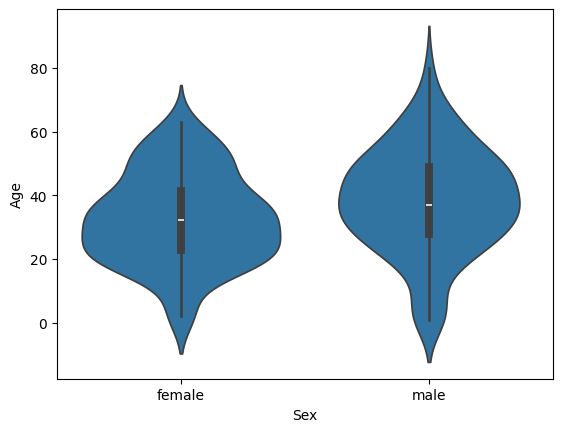

In [114]:
#Bu kod, Seaborn kütüphanesinin violinplot fonksiyonunu kullanarak "Sex" (Cinsiyet) sütununa göre gruplama yapar ve her cinsiyetin yaş (Age) dağılımını gösterir.
sns.violinplot(x=titanic_df["Sex"], y=titanic_df["Age"])

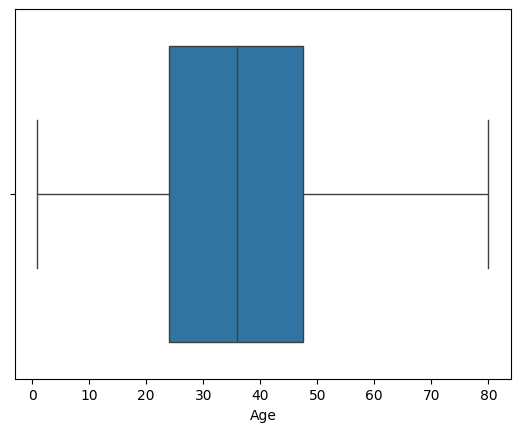

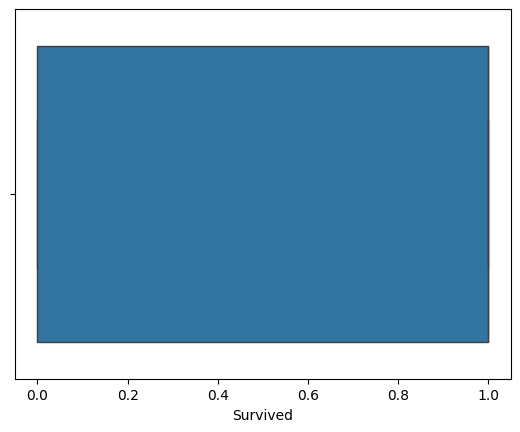

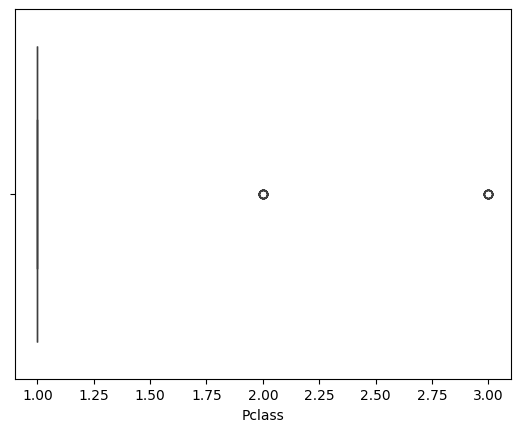

In [116]:
#Bu kod ile Seaborn kütüphanesinin boxplot fonksiyonunu kullanarak sayısal değişkenlerin (yaş, hayatta kalma durumu, yolcu sınıfı) kutu grafiklerini (box plot) çizer. Bu sayede, her bir sayısal değişkenin dağılımı, ortanca değeri, çeyreklikleri ve potansiyel aykırı değerleri görsel olarak incelenir.
num_cols=[
    'Age','Survived', 'Pclass'
]
for num in num_cols:
    sns.boxplot(x=titanic_df[num],data=titanic_df)
    plt.show()

## Korelasyon Matris Ve Isı Haritası

In [138]:
numeric_cols = titanic_df.select_dtypes(include=['float64', 'int64'])

In [139]:
correlation_matrix = numeric_cols.corr()

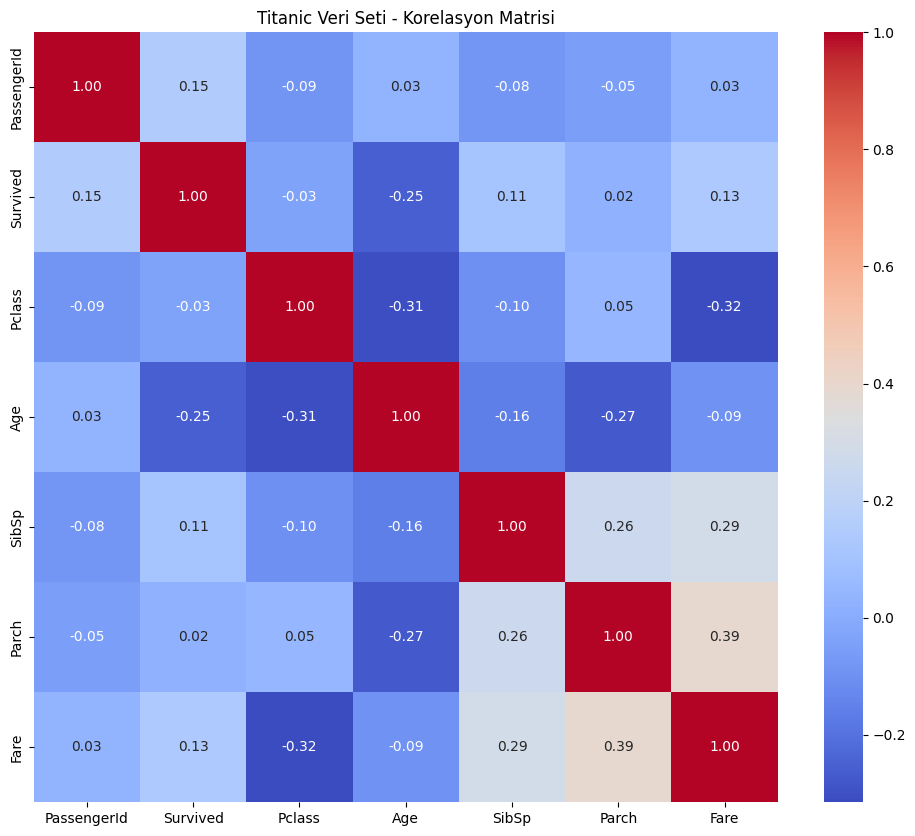

In [140]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Titanic Veri Seti - Korelasyon Matrisi')
plt.show()

In [ ]:
#select_dtypes fonksiyonu ile sadece sayısal (float ve int) değerlere sahip sütunları seçiyoruz. Korelasyon analizi sayısal veriler arasında yapılır.
#corr() fonksiyonu ile sayısal sütunlar arasındaki korelasyon matrisini hesaplıyoruz.
#sns.heatmap() fonksiyonu ile korelasyon matrisini ısı haritası olarak görselleştiriyoruz. 
#annot=True ile değerleri gösteriyoruz, cmap='coolwarm' ile renk paletini belirliyoruz ve fmt=".2f" ile ondalık basamak sayısını belirtiyoruz. 
#Son olarak, plt.show() ile grafiği görüntülüyoruz.